<a href="https://colab.research.google.com/github/Genious-Bajracharya/Python-Projects/blob/main/VgSales_data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploring Trends and Predicting Video Game Sales Performance Using Big Data Analytics: Insights for the Gaming Industry

INstalling Hadoop

In [ ]:
# Installing java
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [ ]:
#creating java home variable
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

In [ ]:
#download hadoop
!wget https://downloads.apache.org/hadoop/common/hadoop-3.3.2/hadoop-3.3.2.tar.gz

--2023-05-13 13:12:06--  https://downloads.apache.org/hadoop/common/hadoop-3.3.2/hadoop-3.3.2.tar.gz
Resolving downloads.apache.org (downloads.apache.org)... 88.99.95.219, 135.181.214.104, 2a01:4f9:3a:2c57::2, ...
Connecting to downloads.apache.org (downloads.apache.org)|88.99.95.219|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 638660563 (609M) [application/x-gzip]
Saving to: ‘hadoop-3.3.2.tar.gz’

hadoop-3.3.2.tar.gz 100%[===================>] 609.07M  31.2MB/s    in 21s     

2023-05-13 13:12:27 (29.1 MB/s) - ‘hadoop-3.3.2.tar.gz’ saved [638660563/638660563]



In [ ]:
#we’ll use the tar command with the -x flag to extract, -z to uncompress,
#-v for verbose output, and -f to specify that we’re extracting from a file
!tar -xzvf hadoop-3.3.2.tar.gz
#copying the hadoop file to user/local
!cp -r hadoop-3.3.2/ /usr/local

In [ ]:
#finding  the default Java path
!readlink -f /usr/bin/java | sed "s:bin/java::"

/usr/lib/jvm/java-11-openjdk-amd64/


In [ ]:
#Running Hadoop
!/usr/local/hadoop-3.3.2/bin/hadoop
!mkdir ~/input
!cp /usr/local/hadoop-3.3.2/etc/hadoop/*.xml ~/input
!ls ~/input
!/usr/local/hadoop-3.3.2/bin/hadoop jar /usr/local/hadoop-3.3.2/share/hadoop/mapreduce/hadoop-mapreduce-examples-3.3.2.jar grep ~/input ~/grep_example 'allowed[.]*'

In [ ]:
# Install pyspark
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.0-py2.py3-none-any.whl size=311317130 sha256=4b8077c24944da3cf3bff5984f6b866bec9fcb9104c97760a2a071c369989b8a
  Stored in directory: /root/.cache/pip/wheels/7b/1b/4b/3363a1d04368e7ff0d408e57ff57966fcdf00583774e761327
Successfully built pyspark


In [ ]:
# Import SparkSession
from pyspark.sql import SparkSession
# Create a Spark Session
spark = SparkSession.builder.master("local[*]").getOrCreate()
# Check Spark Session Information
spark

Creating environment for hadoop

In [ ]:
os.environ["HADOOP_HOME"] = "/content/hadoop-3.3.2"
os.environ["PATH"] = os.environ["HADOOP_HOME"] + "/bin:" + os.environ["PATH"]

In [ ]:
#creating a directory to store the dataset
!hdfs dfs -mkdir /data

In [ ]:
#uploading the dataset
from google.colab import files
uploaded = files.upload()

Saving vgsales.csv to vgsales.csv


In [ ]:
# storing the dataset in hdfs in the folder i made earlier
!hdfs dfs -put vgsales.csv /data

In [ ]:
#chekcing if the dataset has been stored in hdfs
!hdfs dfs -ls /data

Found 1 items
-rw-r--r--   1 root root    1355781 2023-05-13 13:15 /data/vgsales.csv


In [ ]:
#storing the hdfs location in a variable
data="/data/vgsales.csv"

In [ ]:
# Reading the data using spark
df = spark.read.csv(data, header=True, inferSchema=True)

In [ ]:
#showing 20 rows from the dataframe
df.show(20)

+----+--------------------+--------+----+------------+--------------------+--------+--------+--------+-----------+------------+
|Rank|                Name|Platform|Year|       Genre|           Publisher|NA_Sales|EU_Sales|JP_Sales|Other_Sales|Global_Sales|
+----+--------------------+--------+----+------------+--------------------+--------+--------+--------+-----------+------------+
|   1|          Wii Sports|     Wii|2006|      Sports|            Nintendo|   41.49|   29.02|    3.77|       8.46|       82.74|
|   2|   Super Mario Bros.|     NES|1985|    Platform|            Nintendo|   29.08|    3.58|    6.81|       0.77|       40.24|
|   3|      Mario Kart Wii|     Wii|2008|      Racing|            Nintendo|   15.85|   12.88|    3.79|       3.31|       35.82|
|   4|   Wii Sports Resort|     Wii|2009|      Sports|            Nintendo|   15.75|   11.01|    3.28|       2.96|        33.0|
|   5|Pokemon Red/Pokem...|      GB|1996|Role-Playing|            Nintendo|   11.27|    8.89|   10.22|  

In [ ]:
# Importing necessary modules
from pyspark.sql.functions import col, sum, count,isnan, when
# Counting number of rows and columns
num_rows = df.count()
num_cols = len(df.columns)
print("Number of rows: {}".format(num_rows))
print("Number of columns: {}".format(num_cols))


Number of rows: 16598
Number of columns: 11


In [ ]:
df.describe().show()

+-------+-----------------+--------------------+--------+------------------+--------+---------------+-------------------+------------------+-------------------+--------------------+------------------+
|summary|             Rank|                Name|Platform|              Year|   Genre|      Publisher|           NA_Sales|          EU_Sales|           JP_Sales|         Other_Sales|      Global_Sales|
+-------+-----------------+--------------------+--------+------------------+--------+---------------+-------------------+------------------+-------------------+--------------------+------------------+
|  count|            16598|               16598|   16598|             16598|   16598|          16598|              16598|             16598|              16598|               16598|             16598|
|   mean|8300.605253645017|              1942.0|  2600.0|2006.4064433147546|    null|           null|0.26466742981084057|0.1466520062658483|0.07778166044101108|0.048063019640913515|  0.53744065550

In [ ]:
# Checking the data type of each column
df.printSchema()

root
 |-- Rank: integer (nullable = true)
 |-- Name: string (nullable = true)
 |-- Platform: string (nullable = true)
 |-- Year: string (nullable = true)
 |-- Genre: string (nullable = true)
 |-- Publisher: string (nullable = true)
 |-- NA_Sales: double (nullable = true)
 |-- EU_Sales: double (nullable = true)
 |-- JP_Sales: double (nullable = true)
 |-- Other_Sales: double (nullable = true)
 |-- Global_Sales: double (nullable = true)



Here we can see the dataypes for each column> we can see that the column Year is stored in string instead of integers

In [ ]:
df1=df#creating a copy of main df to work on

**Data** **Cleaning**

In [ ]:
from pyspark.sql.functions import col
#converting the type for column Year from string to integer
df1 = df1.withColumn("Year", col("Year").cast("integer"))


In [ ]:
# Checking the data type of each column again
df1.printSchema()

root
 |-- Rank: integer (nullable = true)
 |-- Name: string (nullable = true)
 |-- Platform: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Genre: string (nullable = true)
 |-- Publisher: string (nullable = true)
 |-- NA_Sales: double (nullable = true)
 |-- EU_Sales: double (nullable = true)
 |-- JP_Sales: double (nullable = true)
 |-- Other_Sales: double (nullable = true)
 |-- Global_Sales: double (nullable = true)



Now,  we have converted the column Year to integer as it should be

In [ ]:
# Count the number of non-null values in each column
df1.select([count(col(c)).alias(c) for c in df.columns]).show()

+-----+-----+--------+-----+-----+---------+--------+--------+--------+-----------+------------+
| Rank| Name|Platform| Year|Genre|Publisher|NA_Sales|EU_Sales|JP_Sales|Other_Sales|Global_Sales|
+-----+-----+--------+-----+-----+---------+--------+--------+--------+-----------+------------+
|16598|16598|   16598|16327|16598|    16598|   16598|   16598|   16598|      16598|       16598|
+-----+-----+--------+-----+-----+---------+--------+--------+--------+-----------+------------+



In [ ]:
from pyspark.sql.functions import approx_count_distinct

# Count unique values in 'Genre' column
unique_genres = df1.select(approx_count_distinct('Genre')).collect()[0][0]
print(f"Number of unique genres: {unique_genres}")

Number of unique genres: 12


In [ ]:
# Count unique values in 'Platform' column
unique_platform = df1.select(approx_count_distinct('Platform')).collect()[0][0]
print(f"Number of unique platform: {unique_platform}")

Number of unique platform: 31


In [ ]:
null_counts = df1.select([sum(col(c).isNull().cast("int")).alias(c) for c in df1.columns])
null_counts.show()

+----+----+--------+----+-----+---------+--------+--------+--------+-----------+------------+
|Rank|Name|Platform|Year|Genre|Publisher|NA_Sales|EU_Sales|JP_Sales|Other_Sales|Global_Sales|
+----+----+--------+----+-----+---------+--------+--------+--------+-----------+------------+
|   0|   0|       0| 271|    0|        0|       0|       0|       0|          0|           0|
+----+----+--------+----+-----+---------+--------+--------+--------+-----------+------------+



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
beta = pd.read_csv("/data/vgsales.csv")
beta.isnull().sum()# checing for null values using pandas (Test)

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [ ]:
df1 = df1.na.replace("N/A", None)# Replacing the N/A values in the dataframe with actual null values

In [ ]:
null_counts = df1.select([sum(col(c).isNull().cast("int")).alias(c) for c in df1.columns])
null_counts.show()

+----+----+--------+----+-----+---------+--------+--------+--------+-----------+------------+
|Rank|Name|Platform|Year|Genre|Publisher|NA_Sales|EU_Sales|JP_Sales|Other_Sales|Global_Sales|
+----+----+--------+----+-----+---------+--------+--------+--------+-----------+------------+
|   0|   0|       0| 271|    0|       58|       0|       0|       0|          0|           0|
+----+----+--------+----+-----+---------+--------+--------+--------+-----------+------------+



now we can see the null values being displayed as Year and publisher columns have null vlaues in them

In [ ]:
# Drop rows with null values
df1 = df1.dropna(how='any')

In [ ]:
null_counts = df1.select([sum(col(c).isNull().cast("int")).alias(c) for c in df1.columns])
null_counts.show()

+----+----+--------+----+-----+---------+--------+--------+--------+-----------+------------+
|Rank|Name|Platform|Year|Genre|Publisher|NA_Sales|EU_Sales|JP_Sales|Other_Sales|Global_Sales|
+----+----+--------+----+-----+---------+--------+--------+--------+-----------+------------+
|   0|   0|       0|   0|    0|        0|       0|       0|       0|          0|           0|
+----+----+--------+----+-----+---------+--------+--------+--------+-----------+------------+



In [ ]:
#checking total values again
# Count the number of non-null values in each column
df1.select([count(col(c)).alias(c) for c in df.columns]).show()

+-----+-----+--------+-----+-----+---------+--------+--------+--------+-----------+------------+
| Rank| Name|Platform| Year|Genre|Publisher|NA_Sales|EU_Sales|JP_Sales|Other_Sales|Global_Sales|
+-----+-----+--------+-----+-----+---------+--------+--------+--------+-----------+------------+
|16291|16291|   16291|16291|16291|    16291|   16291|   16291|   16291|      16291|       16291|
+-----+-----+--------+-----+-----+---------+--------+--------+--------+-----------+------------+



As we can see all the rows with null values have been removed


**Data Analysis and Visualisation**

Calculating the total number of games released in each year.

In [ ]:
df1.groupBy('Year').count().orderBy('Year').show(10)

+----+-----+
|Year|count|
+----+-----+
|1980|    9|
|1981|   46|
|1982|   36|
|1983|   17|
|1984|   14|
|1985|   14|
|1986|   21|
|1987|   16|
|1988|   15|
|1989|   17|
+----+-----+
only showing top 10 rows



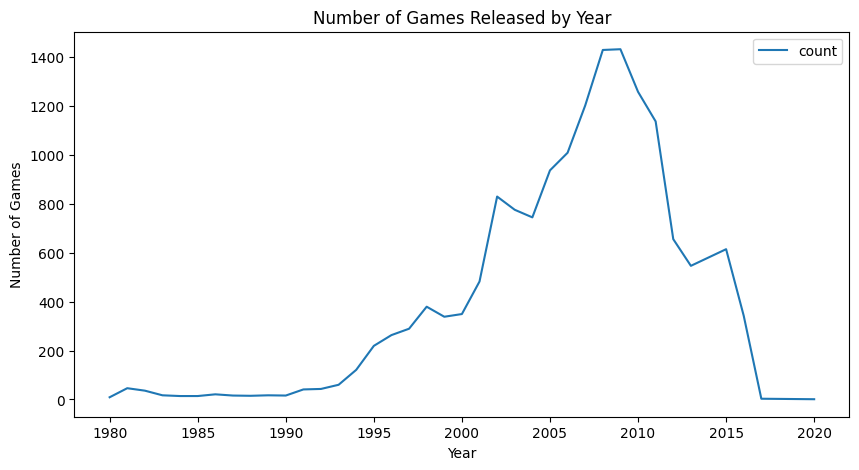

In [ ]:
# convert the Spark DataFrame to a Pandas DataFrame for plotting
pandas_df = df1.groupBy('Year').count().orderBy('Year').toPandas()

# create a line chart using pandas
pandas_df.plot(x='Year', y='count', kind='line', figsize=(10,5))

# add chart labels and title
plt.title('Number of Games Released by Year')
plt.xlabel('Year')
plt.ylabel('Number of Games')
plt.show()

Calculating the total global sales for each publisher

In [ ]:
# df1.groupBy('Publisher').sum('Global_Sales').orderBy('sum(Global_Sales)', ascending=False).show()

from pyspark.sql.functions import round, sum

publisher_sales = df1.groupBy('Publisher').agg(round(sum('Global_Sales'), 2).alias('Total_Sales')).orderBy('Total_Sales', ascending=False)

publisher_sales.show()


+--------------------+-----------+
|           Publisher|Total_Sales|
+--------------------+-----------+
|            Nintendo|    1784.43|
|     Electronic Arts|    1093.39|
|          Activision|     721.41|
|Sony Computer Ent...|     607.28|
|             Ubisoft|     473.54|
|Take-Two Interactive|      399.3|
|                 THQ|     340.44|
|Konami Digital En...|     278.56|
|                Sega|      270.7|
|  Namco Bandai Games|     253.65|
|Microsoft Game St...|     245.79|
|              Capcom|     199.95|
|               Atari|     146.77|
|         Square Enix|     144.73|
|Warner Bros. Inte...|     142.34|
|Disney Interactiv...|     118.76|
|   Eidos Interactive|      96.75|
|           LucasArts|      84.95|
|  Bethesda Softworks|      81.53|
|        Midway Games|      69.29|
+--------------------+-----------+
only showing top 20 rows



Calculating the total sales for each genre and platform

In [ ]:
df1.groupBy(['Genre', 'Platform']).sum('Global_Sales').orderBy('Genre', 'Platform').show()


+------+--------+------------------+
| Genre|Platform| sum(Global_Sales)|
+------+--------+------------------+
|Action|    2600| 26.38999999999999|
|Action|     3DS| 56.61000000000005|
|Action|      DC|              1.26|
|Action|      DS|114.15999999999995|
|Action|      GB|              7.92|
|Action|     GBA|54.260000000000005|
|Action|      GC| 37.24999999999999|
|Action|     GEN|2.7399999999999998|
|Action|     N64|29.439999999999998|
|Action|     NES|28.750000000000004|
|Action|      PC| 30.67000000000001|
|Action|      PS| 125.7399999999999|
|Action|     PS2| 272.4299999999997|
|Action|     PS3|304.01999999999947|
|Action|     PS4| 87.06000000000006|
|Action|     PSP| 62.66000000000004|
|Action|     PSV|20.000000000000025|
|Action|     SAT|0.6499999999999999|
|Action|    SNES|10.079999999999998|
|Action|     Wii|110.48000000000008|
+------+--------+------------------+
only showing top 20 rows



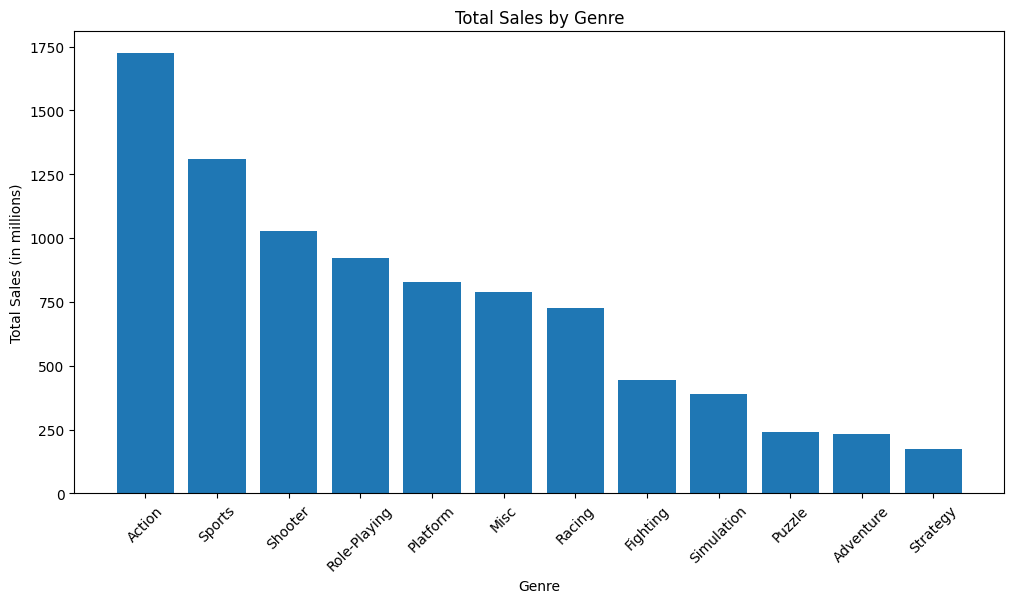

In [ ]:
# grouping by genre and sum global sales
genre_sales = df1.groupBy('Genre').agg({'Global_Sales': 'sum'})

# sorting by global sales in descending order
genre_sales = genre_sales.orderBy('sum(Global_Sales)', ascending=False)

# converting to Pandas DataFrame for visualization
genre_sales_pd = genre_sales.toPandas()

# Visualising
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.bar(genre_sales_pd['Genre'], genre_sales_pd['sum(Global_Sales)'])
plt.title('Total Sales by Genre')
plt.xlabel('Genre')
plt.ylabel('Total Sales (in millions)')
plt.xticks(rotation=45)
plt.show()








In terms of Global sales Action games have a huge market folloed upby the sports genre

In [ ]:
# Filtering the dataset to include only games released in the last 10 years
recent_years = 10
latest_year = df1.selectExpr('max(Year) as max_year').collect()[0]['max_year']
filtered_df = df1.filter(df1.Year > latest_year - recent_years)

#Grouping the filtered data by genre and calculating the total sales for each genre
filtered_genre_sales = filtered_df.groupBy('Genre').agg({'Global_Sales': 'sum'}).withColumnRenamed('sum(Global_Sales)', 'Total_Sales').orderBy('Total_Sales', ascending=False)
filtered_genre_sales.show()



+------------+------------------+
|       Genre|       Total_Sales|
+------------+------------------+
|      Action| 555.8199999999927|
|     Shooter| 385.3899999999999|
|Role-Playing|235.19000000000025|
|      Sports|232.26999999999987|
|        Misc| 141.1900000000003|
|    Platform| 88.77000000000002|
|      Racing| 88.74999999999997|
|    Fighting| 67.18999999999998|
|  Simulation|49.160000000000025|
|   Adventure| 44.46000000000015|
|    Strategy|21.870000000000015|
|      Puzzle|10.049999999999992|
+------------+------------------+



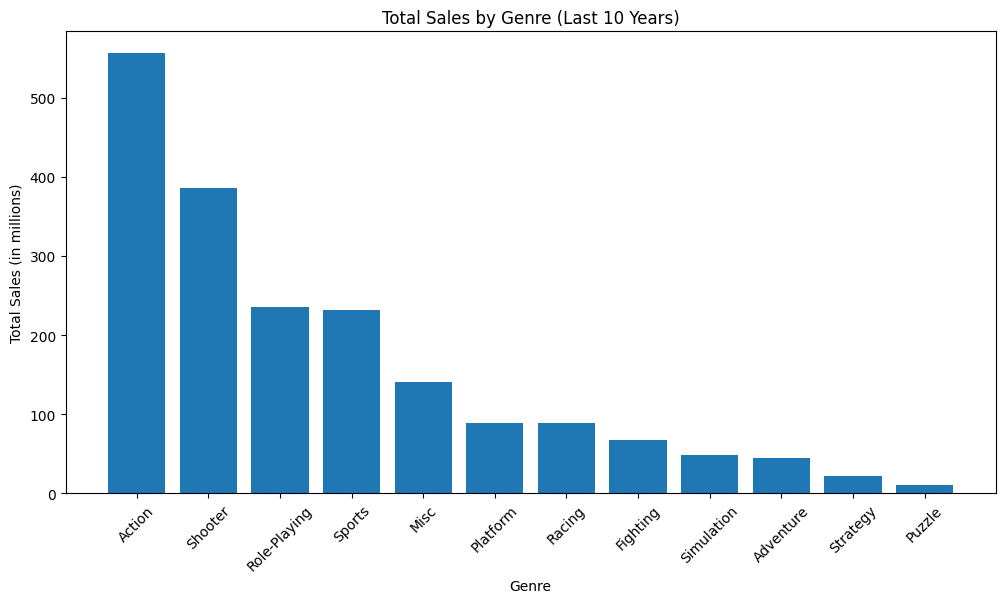

In [ ]:
#visualising
genre = [row['Genre'] for row in filtered_genre_sales.collect()]
sales = [row['Total_Sales'] for row in filtered_genre_sales.collect()]

plt.figure(figsize=(12, 6))
plt.bar(genre, sales)
plt.title('Total Sales by Genre (Last 10 Years)')
plt.xlabel('Genre')
plt.ylabel('Total Sales (in millions)')
plt.xticks(rotation=45)
plt.show()

Comparing the overall and the recent 10 yeasr chart we can see that the action still has the highest sales where as third highest sales is taken by Role-playin genre compared to the shooter which has moved to number two

In [ ]:
# Filtering the dataset to include only games released in the last 10 years
recent_years = 10
latest_year = df1.selectExpr('min(Year) as min_year').collect()[0]['min_year']
filtered_df = df1.filter(df1.Year < latest_year + recent_years)

#Grouping the filtered data by genre and calculating the total sales for each genre
filtered_genre_sales = filtered_df.groupBy('Genre').agg({'Global_Sales': 'sum'}).withColumnRenamed('sum(Global_Sales)', 'Total_Sales').orderBy('Total_Sales', ascending=False)
filtered_genre_sales.show()

+------------+------------------+
|       Genre|       Total_Sales|
+------------+------------------+
|    Platform|122.27000000000001|
|      Puzzle|             62.73|
|     Shooter|59.790000000000006|
|      Action| 51.18000000000003|
|      Sports|             32.28|
|Role-Playing|15.249999999999998|
|      Racing|12.100000000000001|
|        Misc|              8.45|
|    Fighting|              7.24|
|   Adventure|              4.78|
|  Simulation|              0.51|
+------------+------------------+



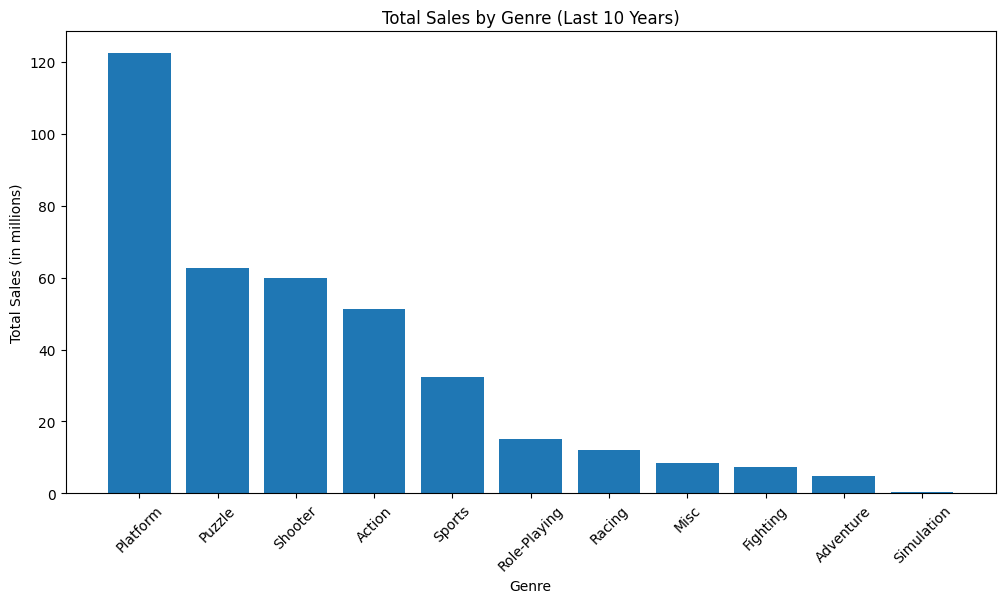

In [ ]:
#visualising
genre = [row['Genre'] for row in filtered_genre_sales.collect()]
sales = [row['Total_Sales'] for row in filtered_genre_sales.collect()]

plt.figure(figsize=(12, 6))
plt.bar(genre, sales)
plt.title('Total Sales by Genre (Last 10 Years)')
plt.xlabel('Genre')
plt.ylabel('Total Sales (in millions)')
plt.xticks(rotation=45)
plt.show()

**Analyzing Data by platform**

In [ ]:
from pyspark.sql.functions import desc, round


platform_genre_sales = df1.groupby(['Platform', 'Genre']).agg(round(sum('Global_Sales'),2).alias('Total_Sales')).orderBy(desc('Total_Sales'))
platform_genre_sales.show()





+--------+------------+-----------+
|Platform|       Genre|Total_Sales|
+--------+------------+-----------+
|     PS3|      Action|     304.02|
|     Wii|      Sports|     289.95|
|    X360|     Shooter|     277.23|
|     PS2|      Action|     272.43|
|     PS2|      Sports|     262.64|
|    X360|      Action|     239.67|
|     Wii|        Misc|     217.43|
|     PS3|     Shooter|      195.8|
|     PS2|      Racing|     154.21|
|      DS|        Misc|     137.67|
|    X360|      Sports|     137.43|
|     PS3|      Sports|     134.91|
|      DS|  Simulation|     131.65|
|      DS|Role-Playing|     126.56|
|      PS|      Action|     125.74|
|      PS|      Sports|     119.51|
|      DS|      Action|     114.16|
|     Wii|      Action|     110.48|
|     PS2|     Shooter|     108.28|
|      PS|      Racing|     102.89|
+--------+------------+-----------+
only showing top 20 rows



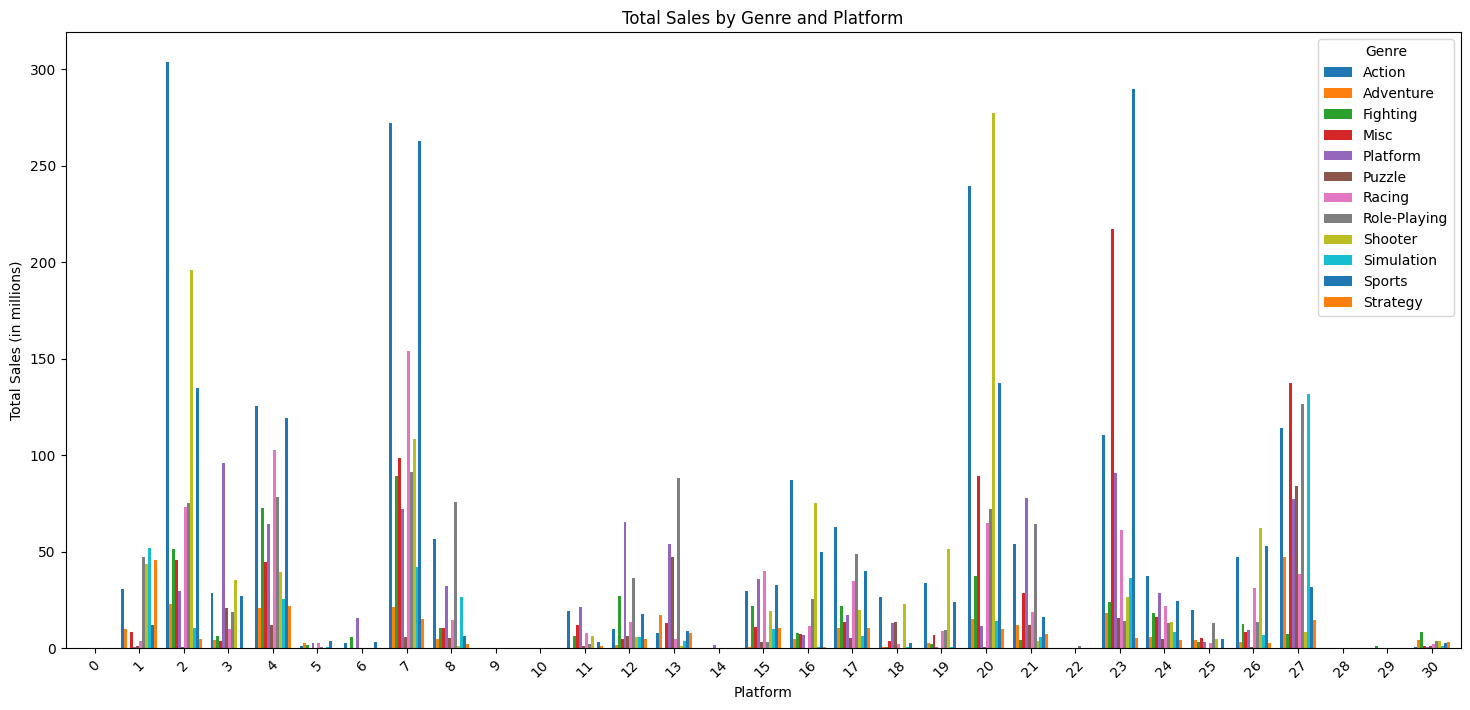

In [ ]:
# Pivoingt the platform_genre_sales DataFrame to create a bar chart
platform_genre_pivot = platform_genre_sales.groupby('Platform').pivot('Genre').sum('Total_Sales').fillna(0)
platform_genre_pivot_pd = platform_genre_pivot.toPandas()

pivoted = platform_genre_sales.groupby('Platform').pivot('Genre').sum('Total_Sales').fillna(0)
pivoted = pivoted.withColumnRenamed('2600', 'Atari 2600')

# genre_sales_pd = genre_sales.toPandas()

# Plot the grouped bar chart                 /////////////////////////////////////////////////
(pivoted.toPandas().plot(kind='bar', figsize=(18, 8), width=0.8))
plt.title('Total Sales by Genre and Platform')
plt.xlabel('Platform')
plt.ylabel('Total Sales (in millions)')
plt.xticks(rotation=45)
plt.legend(title='Genre')
plt.show()

**Analyzing by** **publisher**

+--------------------+------------+
|           Publisher|Global_Sales|
+--------------------+------------+
|            Nintendo|     1784.43|
|     Electronic Arts|     1093.39|
|          Activision|      721.41|
|Sony Computer Ent...|      607.28|
|             Ubisoft|      473.54|
|Take-Two Interactive|       399.3|
|                 THQ|      340.44|
|Konami Digital En...|      278.56|
|                Sega|       270.7|
|  Namco Bandai Games|      253.65|
+--------------------+------------+
only showing top 10 rows



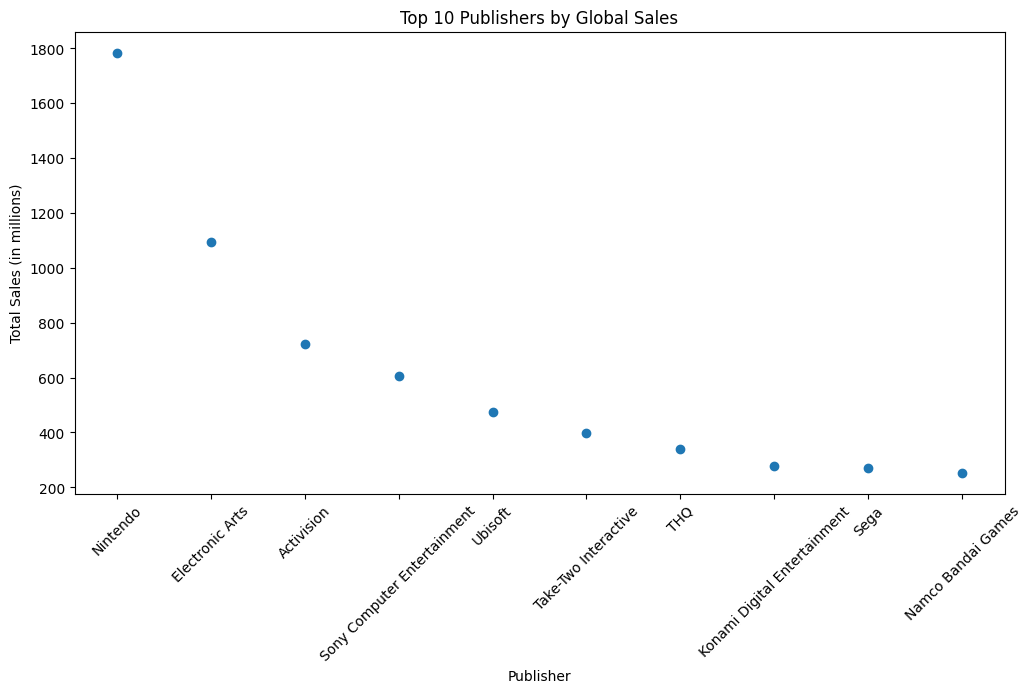

In [ ]:
publisher_sales = df1.groupBy('Publisher').agg(round(sum('Global_Sales'),2).alias('Global_Sales')).orderBy('Global_Sales', ascending=False)
publisher_sales.show(10)# Displaing the top 10 publishers

top_publishers = publisher_sales.limit(10).toPandas()

#Visualising
plt.figure(figsize=(12, 6))
plt.bar(top_publishers['Publisher'], top_publishers['Global_Sales'])
plt.title('Top 10 Publishers by Global Sales')
plt.xlabel('Publisher')
plt.ylabel('Total Sales (in millions)')
plt.xticks(rotation=45)
plt.show()

**Analyze regional sales by genres**

In [ ]:
df1.createOrReplaceTempView("vgsales")#////////////////////////////////////////////////////////////////////////////////////////
sqlDF = spark.sql("SELECT genre, SUM(global_sales) as total_sales FROM vgsales GROUP BY genre ORDER BY total_sales DESC")
sqlDF.show(10)
df1.groupBy('Platform').agg({'NA_Sales': 'sum', 'EU_Sales': 'sum', 'JP_Sales': 'sum', 'Other_Sales': 'sum'}).show()

+------------+------------------+
|       genre|       total_sales|
+------------+------------------+
|      Action| 1722.839999999971|
|      Sports| 1309.239999999988|
|     Shooter|1026.1999999999957|
|Role-Playing| 923.8299999999941|
|    Platform| 829.1299999999976|
|        Misc|  789.869999999994|
|      Racing| 726.7599999999954|
|    Fighting| 444.0499999999994|
|  Simulation|  389.979999999998|
|      Puzzle|242.21000000000052|
+------------+------------------+
only showing top 10 rows

+--------+------------------+-------------------+------------------+------------------+
|Platform|     sum(EU_Sales)|      sum(JP_Sales)|     sum(NA_Sales)|  sum(Other_Sales)|
+--------+------------------+-------------------+------------------+------------------+
|     3DO|               0.0|                0.1|               0.0|               0.0|
|      PC|137.35000000000008|0.16999999999999998| 92.04000000000052|24.330000000000428|
|     PS3| 340.4699999999981|  79.21000000000005|388.89999

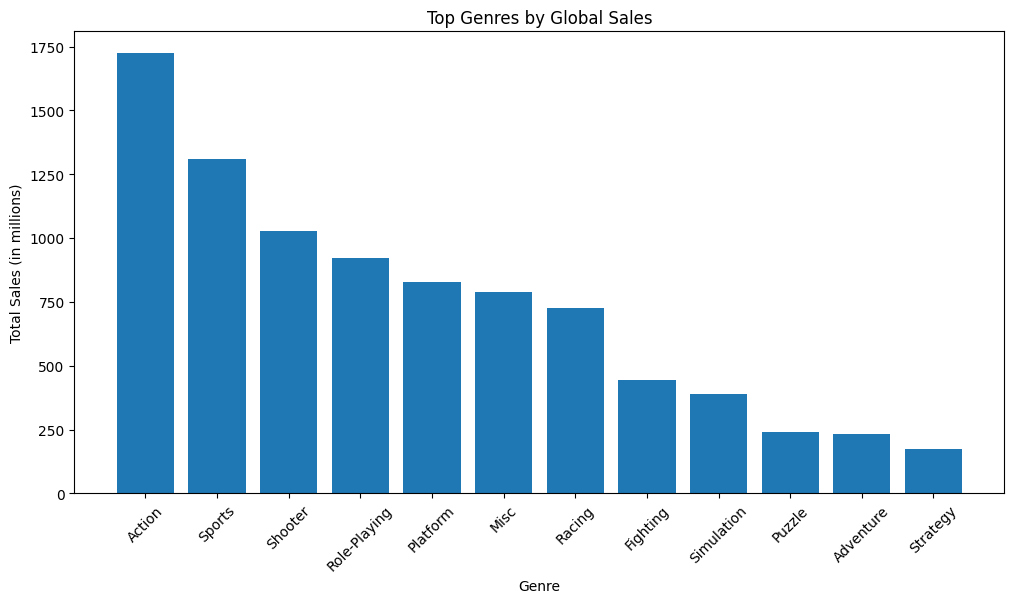

In [ ]:
# Converting the SQL query result to pandas dataframe for ploting
genre_sales_df = sqlDF.toPandas()

# Visualising bar chart
plt.figure(figsize=(12, 6))
plt.bar(genre_sales_df['genre'], genre_sales_df['total_sales'])
plt.title('Top Genres by Global Sales')
plt.xlabel('Genre')
plt.ylabel('Total Sales (in millions)')
plt.xticks(rotation=45)
plt.show()

In [ ]:
#Calculating the total sales for each year and region.
df1.groupBy(['Year']).agg({'NA_Sales': 'sum', 'EU_Sales': 'sum', 'JP_Sales': 'sum', 'Other_Sales': 'sum'}).orderBy('Year').show()

+----+------------------+------------------+------------------+-------------------+
|Year|     sum(EU_Sales)|     sum(JP_Sales)|     sum(NA_Sales)|   sum(Other_Sales)|
+----+------------------+------------------+------------------+-------------------+
|1980|0.6700000000000002|               0.0|10.590000000000003|0.11999999999999998|
|1981|1.9600000000000006|               0.0|              33.4| 0.3200000000000001|
|1982|1.6500000000000008|               0.0|26.920000000000005|0.31000000000000016|
|1983|0.8000000000000003|               8.1|              7.76|0.13999999999999999|
|1984|2.0999999999999996|14.269999999999998|             33.28| 0.7000000000000002|
|1985|              4.74|             14.56|             33.73| 0.9200000000000002|
|1986|2.8400000000000007|             19.81|              12.5| 1.9300000000000002|
|1987|1.4100000000000001|             11.63| 8.460000000000003|0.20000000000000004|
|1988| 6.590000000000001|15.759999999999998|23.869999999999997| 0.9900000000

In [ ]:
#visualising

In [ ]:
#Calculating the top 10 bestselling games for each year.
from pyspark.sql.window import Window
from pyspark.sql.functions import row_number

window = Window.partitionBy('Year').orderBy(df1['Global_Sales'].desc())
df1.select('Year', 'Name', 'Global_Sales', row_number().over(window).alias('rank')).filter('rank <= 10').orderBy('Year', 'rank').show()

+----+--------------------+------------+----+
|Year|                Name|Global_Sales|rank|
+----+--------------------+------------+----+
|1980|           Asteroids|        4.31|   1|
|1980|     Missile Command|        2.76|   2|
|1980|             Kaboom!|        1.15|   3|
|1980|            Defender|        1.05|   4|
|1980|              Boxing|        0.77|   5|
|1980|          Ice Hockey|        0.49|   6|
|1980|             Freeway|        0.34|   7|
|1980|              Bridge|        0.27|   8|
|1980|            Checkers|        0.24|   9|
|1981|            Pitfall!|         4.5|   1|
|1981|             Frogger|         2.2|   2|
|1981|        Demon Attack|        2.13|   3|
|1981|E.T.: The Extra T...|        1.97|   4|
|1981|         Ms. Pac-Man|        1.65|   5|
|1981|          River Raid|         1.6|   6|
|1981|         Donkey Kong|        1.46|   7|
|1981|           Centipede|        1.36|   8|
|1981|            Atlantis|        1.27|   9|
|1981|           Megamania|       

In [ ]:
#Visualising

In [ ]:
#Analysis for Top 10 Platforms in Recent 10 Years:
from pyspark.sql.functions import year

# filter data for recent 10 years
recent_df = df1.filter((df1['Year']) >= 2010)

# group by platform and calculate total global sales
platform_sales = recent_df.groupby('Platform').agg({'Global_Sales': 'sum'})

# sort by global sales in descending order
platform_sales = platform_sales.orderBy('sum(Global_Sales)', ascending=False)

# select top 10 platforms by global sales
top_10_platforms = platform_sales.limit(10)

# display results
top_10_platforms.show()

+--------+------------------+
|Platform| sum(Global_Sales)|
+--------+------------------+
|     PS3| 602.4399999999983|
|    X360| 556.9499999999979|
|     PS4| 278.0999999999994|
|     3DS|246.27000000000007|
|     Wii|232.33000000000035|
|    XOne|141.05999999999995|
|      DS| 129.6400000000003|
|      PC| 119.7800000000001|
|    WiiU| 81.86000000000006|
|     PSP| 64.27000000000041|
+--------+------------------+



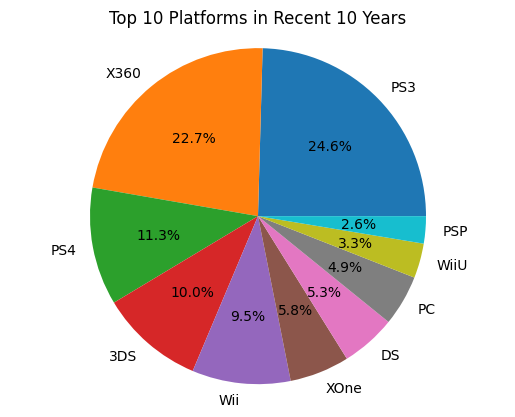

In [ ]:
#visualising
# convert spark dataframe to pandas dataframe
platform_sales_pd = top_10_platforms.toPandas()

# plot pie chart
plt.pie(platform_sales_pd['sum(Global_Sales)'], labels=platform_sales_pd['Platform'], autopct='%1.1f%%')
plt.title('Top 10 Platforms in Recent 10 Years')
plt.axis('equal')
plt.show()


In [ ]:
#Analysis for Top 10 Platforms in First 10 Years:
# filter data for first 10 years
early_df = df1.filter((df1['Year']) < 2000)

# group by platform and calculate total global sales
platform_sales = early_df.groupby('Platform').agg({'Global_Sales': 'sum'})

# sort by global sales in descending order
platform_sales = platform_sales.orderBy('sum(Global_Sales)', ascending=False)

# select top 10 platforms by global sales
top_10_platforms = platform_sales.limit(10)

# display results
top_10_platforms.show()

+--------+------------------+
|Platform| sum(Global_Sales)|
+--------+------------------+
|      PS| 586.8499999999987|
|     NES|251.06999999999988|
|      GB|225.41999999999996|
|    SNES|200.05000000000024|
|     N64|180.86000000000004|
|    2600| 86.57000000000005|
|      PC|             50.04|
|     SAT| 33.59000000000002|
|     GEN|28.360000000000003|
|      DC| 8.560000000000002|
+--------+------------------+



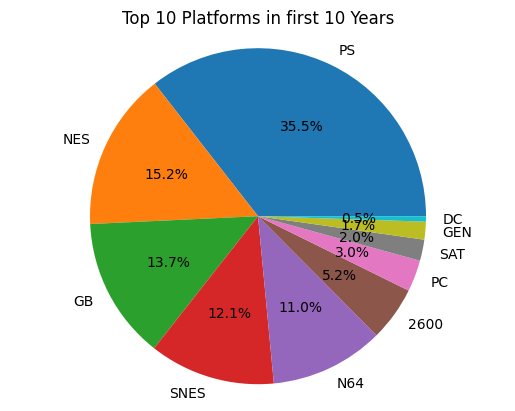

In [ ]:
#visualising
# converting pyspark dataframe to pandas dataframe
# convert spark dataframe to pandas dataframe
platform_sales_pd = top_10_platforms.toPandas()

# plot pie chart
plt.pie(platform_sales_pd['sum(Global_Sales)'], labels=platform_sales_pd['Platform'], autopct='%1.1f%%')
plt.title('Top 10 Platforms in first 10 Years')
plt.axis('equal')
plt.show()


**Chossing most suitable model**

In [ ]:
df2=df1#test

In [ ]:
#Importing necessary libraires
#Success or failure of video game

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [ ]:
#COnverting pyspark dataframe to pandas
pandas_df = df2.toPandas()

def label_success(row):
    if row['Global_Sales'] >= 10: #Great Success
        return 2
    elif row['Global_Sales'] >= 1: #Mid
        return 1
    else:
        return 0 #failure

pandas_df['Success'] = pandas_df.apply(lambda row: label_success(row), axis=1)
pandas_df.head()



,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Success
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,2
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,2
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,2
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,2
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,2


In [ ]:
# Selecting the relevant columns for the prediction model
X = pandas_df[['Genre', 'Platform', 'Year']]
y = pandas_df['Success']

# Converting categorical variables to numerical using one-hot encoding
X = pd.get_dummies(X)





Now we try out different models for as the best one cannot be decided

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train a logistic regression model on the training data
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict success or failure on the test data
y_pred = model.predict(X_test)
acc_logreg = accuracy_score(y_pred, y_test) * 100
print(acc_logreg)

# Evaluating the model's performance
# print(classification_report(y_test, y_pred))

87.91040196379257


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support

# Train a support vector machine model on the training data
model = SVC()
model.fit(X_train, y_train)



# Predict success or failure on the test data
y_pred = model.predict(X_test)
acc_svc = accuracy_score(y_pred, y_test) * 100
print("accuracy:",acc_svc)


# Evaluate the model's performance
# print(classification_report(y_test, y_pred))

accuracy: 87.54219085609083


Decission Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# Train a decision tree classifier model on the training data
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Predict success or failure on the test data
y_pred = model.predict(X_test)
acc_decisiontree = accuracy_score(y_pred, y_test) * 100
print("accuracy:",acc_decisiontree)

# Evaluate the model's performance
print(classification_report(y_test, y_pred))

accuracy: 87.32740104326481
              precision    recall  f1-score   support

           0       0.88      0.99      0.93      2853
           1       0.42      0.07      0.12       392
           2       0.00      0.00      0.00        14

    accuracy                           0.87      3259
   macro avg       0.44      0.35      0.35      3259
weighted avg       0.82      0.87      0.83      3259



RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


# Creating the Random Forest Classifier model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fitting the model on the training data
rf.fit(X_train, y_train)

# Predicting the success/failure of video games on the testing data
y_pred = rf.predict(X_test)


# Calculating the accuracy of the model
accuracy_RandomForest = accuracy_score(y_test, y_pred)* 100
print("Accuracy of Random Forest Classifier: ", accuracy_RandomForest)

Accuracy of Random Forest Classifier:  86.9285056765879


KNeighborsClassifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier



# Creating the KNN Classifier model
knn = KNeighborsClassifier(n_neighbors=5)

# Fitting the model on the training data
knn.fit(X_train, y_train)

# Predicting the success/failure of video games on the testing data
y_pred = knn.predict(X_test)

# Calculating the accuracy of the model
accuracy_knn = accuracy_score(y_test, y_pred)* 100
print("Accuracy of KNN Classifier: ", accuracy_knn)

Accuracy of KNN Classifier:  85.67045105860693


Now after using several models we will see which model performed the best

In [ ]:
models = pd.DataFrame({
'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression',
'Random Forest', 'Decision Tree'],
'Score': [acc_svc, accuracy_knn, acc_logreg,
accuracy_RandomForest, acc_decisiontree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
2,Logistic Regression,87.910402
0,Support Vector Machines,87.542191
4,Decision Tree,87.327401
3,Random Forest,86.928506
1,KNN,85.670451
